# Telco Customer Churn
The percentage of a company’s clientele that stops purchasing the company’s goods or services during a specified period of time is referred to as “customer churn.” 

The goal of this analysis is to predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

Content
---
Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The data set includes information about:
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
# import libraries
import pandas as pd
import numpy as np
# read csv data
data = pd.read_csv('https://raw.githubusercontent.com/srees1988/predict-churn-py/main/customer_churn_data.csv')

In [2]:
data.head(5).T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


## Exploratory Data Analysis (EDA)

In [3]:
data.info() # data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


`TotalCharges` feature is an object instead of float.

*This is because null values are coded as empty string causing the type of column to be object instead of float.*

In [4]:
# replace blanks with np.nan
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan).astype('float64')
# check dtypes after the fix
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [5]:
# check missing values
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We will not remove these as PyCaret will automatically impute the missing values before training the model. Since this is a classification problem, let’s also check the target balance:

<Axes: xlabel='Churn'>

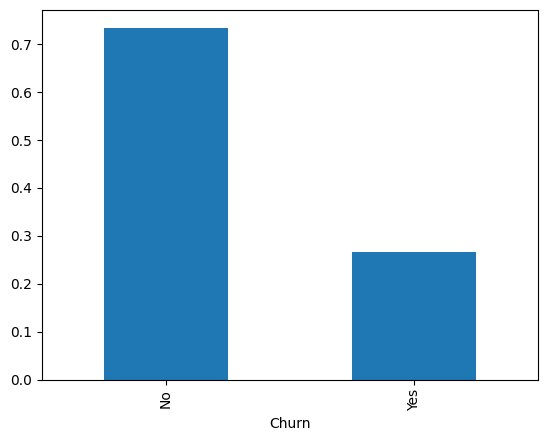

In [6]:
# check the target balance
data['Churn'].value_counts(normalize = True).plot.bar()

## Model Training and Selection

In [7]:
# initialize setup
from pycaret.classification import *
s = setup(data, target = 'Churn',
          session_id = 123,
          ignore_features = ['customerID'],
          log_experiment = True,
          experiment_name = 'churn1')

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 21)"
5,Transformed data shape,"(7043, 41)"
6,Transformed train set shape,"(4930, 41)"
7,Transformed test set shape,"(2113, 41)"
8,Ignore features,1
9,Numeric features,4


2025/03/28 09:43:50 INFO mlflow.tracking.fluent: Experiment with name 'churn1' does not exist. Creating a new experiment.


In [8]:
# compare models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8028,0.8451,0.8028,0.7954,0.7973,0.4682,0.4716,0.6660
ada,Ada Boost Classifier,0.8022,0.8472,0.8022,0.7929,0.7944,0.4575,0.4632,0.2080
gbc,Gradient Boosting Classifier,0.8006,0.8481,0.8006,0.7916,0.7932,0.4550,0.4602,0.3350
ridge,Ridge Classifier,0.7994,0.8374,0.7994,0.7899,0.7915,0.4494,0.4552,0.1290
lda,Linear Discriminant Analysis,0.7968,0.8374,0.7968,0.7902,0.7922,0.4572,0.4595,0.1300
lightgbm,Light Gradient Boosting Machine,0.7903,0.8352,0.7903,0.7823,0.7846,0.4356,0.4385,0.5090
rf,Random Forest Classifier,0.7876,0.8218,0.7876,0.7767,0.7789,0.4160,0.4215,0.3090
et,Extra Trees Classifier,0.7682,0.7922,0.7682,0.7563,0.7595,0.3661,0.3704,0.2960
knn,K Neighbors Classifier,0.7655,0.7497,0.7655,0.7521,0.7559,0.3551,0.3595,0.6140
dummy,Dummy Classifier,0.7347,0.5000,0.7347,0.5398,0.6223,0.0000,0.0000,0.1190


From the output of this function we can see that in this use-case Logistic Regression is the best performing model based on Accuracy and F1. The trained scikit-learn model is also returned with this function.

In [9]:
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Check out the final pipeline using the save_model function and deploy the pipeline in your choice of environment.

In [10]:
# save pipeline
save_model(best_model, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['SeniorCitizen', 'tenure',
                                              'MonthlyCharges', 'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty...
                                                               handle_missing='return_nan',
                                                               handle_unknown='value',
                                

Visualizing the pipeline:

In [11]:
# load pipeline from file
my_pipeline = load_model('my_first_pipeline')
# sklearn settings to render diagram
from sklearn import set_config
set_config(display = 'diagram')
# display pipeline
print(my_pipeline)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\brjap\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['SeniorCitizen', 'tenure',
                                             'MonthlyCharges', 'TotalCharges'],
                                    transformer=SimpleImputer(add_indicator=Fa...
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                     

In [12]:
my_pipeline

Pipeline(memory=FastMemory(location=C:\Users\brjap\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['SeniorCitizen', 'tenure',
                                             'MonthlyCharges', 'TotalCharges'],
                                    transformer=SimpleImputer(add_indicator=Fa...
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('trained_model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

## Track the experiments in MLflow
Because we have passed `log_experiment = True` in the setup function. PyCaret has logged everything using MLFlow

In [13]:
# start the mlflow ui
!mlflow ui

^C
